In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("merc_data.csv")

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

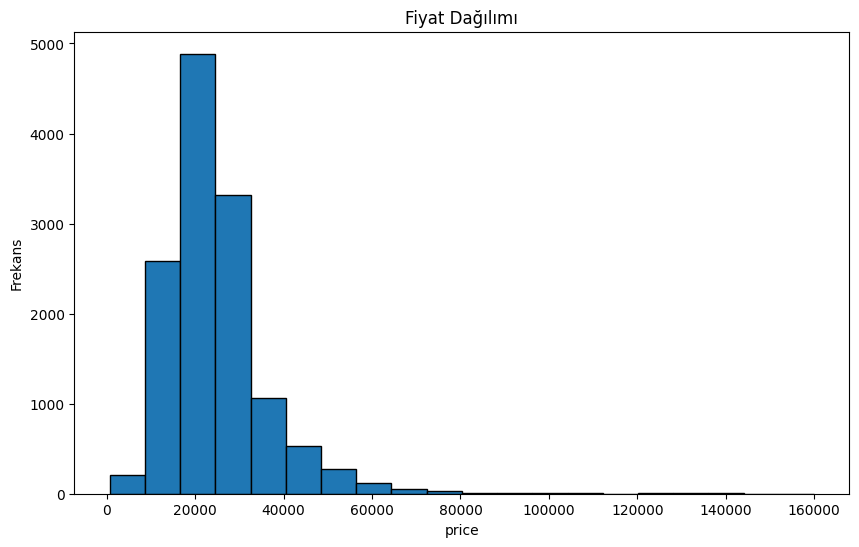

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=20, edgecolor='black')
plt.title('Fiyat Dağılımı')
plt.xlabel('price')
plt.ylabel('Frekans')
plt.show()


In [7]:
# Her bir title için veri sayısı
title_counts = df['model'].value_counts()

# Sonuçları yazdır
print(title_counts)


model
 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: count, dtype: int64


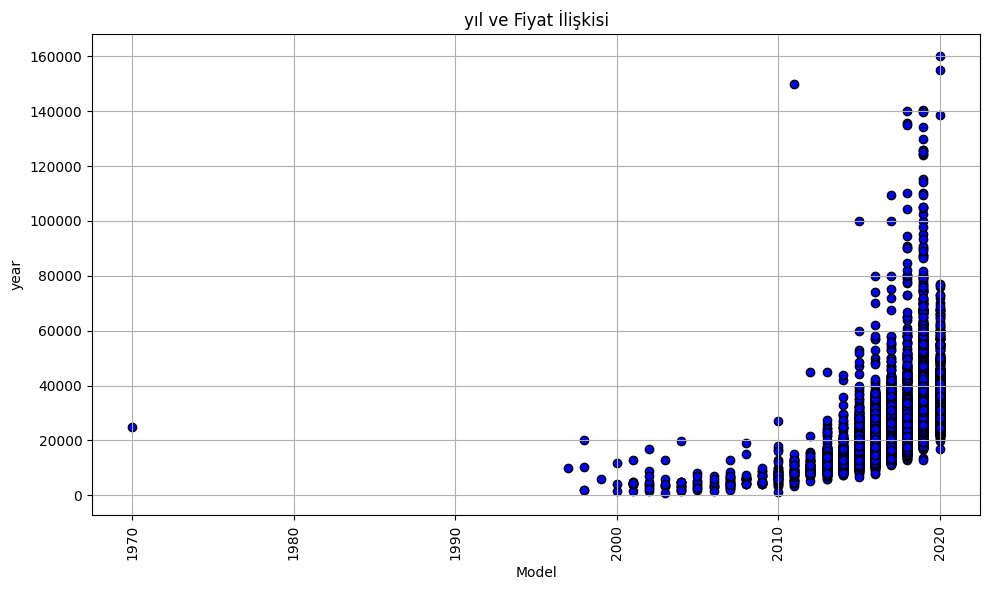

In [8]:
models = df['year']
prices = df['price']

# Model ve fiyat dağılımı
plt.figure(figsize=(10, 6))
plt.scatter(models, prices, color='blue', edgecolor='black')
plt.title('yıl ve Fiyat İlişkisi')
plt.xlabel('Model')
plt.ylabel('year')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

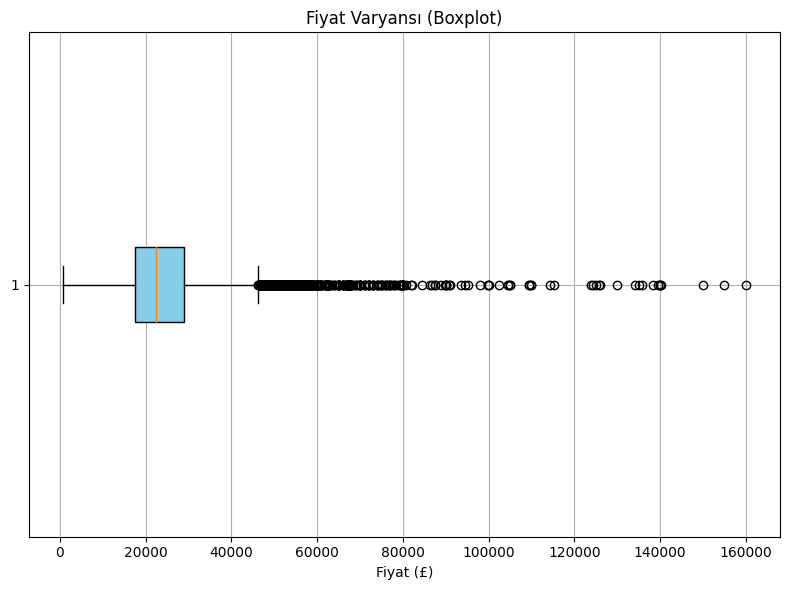

In [9]:
# Boxplot ile fiyat varyansını görselleştirme
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Fiyat Varyansı (Boxplot)')
plt.xlabel('Fiyat (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Sayısal sütunları seçelim
numeric_df = df.select_dtypes(include=[float, int])

# Fiyat ile diğer sayısal değişkenlerin korelasyonu
price_correlation = numeric_df.corr()['price'].drop('price') 

In [11]:
price_correlation

year          0.520712
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

C:\Users\34mam\AppData\Local\Temp\ipykernel_14088\3311064776.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_correlation.index, y=price_correlation.values, palette='viridis')


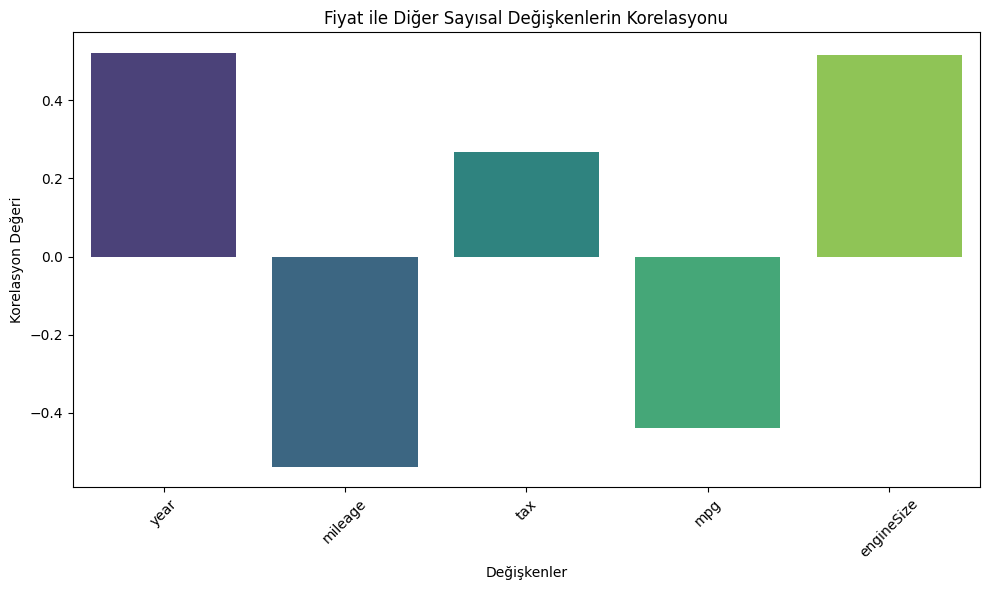

In [12]:
numeric_df = df.select_dtypes(include=[float, int])

# Fiyat ile diğer sayısal değişkenlerin korelasyonu
price_correlation = numeric_df.corr()['price'].drop('price')

# Çubuk grafik ile korelasyonları görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index, y=price_correlation.values, palette='viridis')
plt.title('Fiyat ile Diğer Sayısal Değişkenlerin Korelasyonu')
plt.xlabel('Değişkenler')
plt.ylabel('Korelasyon Değeri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df1 = df.copy()
df1['model_encoded'] = label_encoder.fit_transform(df['model'])
df1['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])
df1['fuelType_encoded'] = label_encoder.fit_transform(df['fuelType'])


df1 = df1.drop(['model', 'transmission', 'fuelType'], axis=1)

In [14]:
df1

,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
0,2005,5200,63000,325,32.1,1.8,20,0,3
1,2017,34948,27000,20,61.4,2.1,18,0,1
2,2016,49948,6200,555,28.0,5.5,19,0,3
3,2016,61948,16000,325,30.4,4.0,9,0,3
4,2016,73948,4000,325,30.1,4.0,9,0,3
...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,2,0,0
13115,2020,24699,2500,145,55.4,2.0,1,0,0
13116,2019,30999,11612,145,41.5,2.1,13,0,0
13117,2019,37990,2426,145,45.6,2.0,7,0,0


In [15]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [16]:
df_one_hot = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)

df_one_hot.head()


,year,price,mileage,tax,mpg,engineSize,model_ B Class,model_ C Class,model_ CL Class,model_ CLA Class,...,model_180,model_200,model_220,model_230,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,5200,63000,325,32.1,1.8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2017,34948,27000,20,61.4,2.1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2016,49948,6200,555,28.0,5.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2016,61948,16000,325,30.4,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2016,73948,4000,325,30.1,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
#xscaled = (x - xmin) / (xmax - xmin)


In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

numerical_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
df_min_max_scaled = df1.copy()

df_min_max_scaled[numerical_cols] = min_max_scaler.fit_transform(df1[numerical_cols])

print("Min-Max Scaled Data:")
df_min_max_scaled.head()


Min-Max Scaled Data:


,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
0,0.70,0.028554,0.243240,0.560345,0.143386,0.290323,20,0,3
1,0.94,0.215238,0.104244,0.034483,0.278908,0.338710,18,0,1
2,0.92,0.309371,0.023934,0.956897,0.124422,0.887097,19,0,3
3,0.92,0.384678,0.061772,0.560345,0.135523,0.645161,9,0,3
4,0.92,0.459984,0.015440,0.560345,0.134135,0.645161,9,0,3


In [19]:
#xscaled = (x - Xort) / σ

In [20]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_standard_scaled = df1.copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df1[numerical_cols])

print("Standard Scaled Data:")
df_standard_scaled.head()


Standard Scaled Data:


,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_encoded,fuelType_encoded
0,-5.527354,-1.646532,1.938563,2.988575,-1.514888,-0.474367,20,0,3
1,-0.133186,0.865496,0.238502,-1.685196,0.410273,0.049738,18,0,1
2,-0.582700,2.132150,-0.743756,6.513058,-1.784279,5.989596,19,0,3
3,-0.582700,3.145474,-0.280962,2.988575,-1.626587,3.369070,9,0,3
4,-0.582700,4.158797,-0.847649,2.988575,-1.646298,3.369070,9,0,3


In [21]:
# Sayısal sütunları seçelim
numeric_df = df_standard_scaled.select_dtypes(include=[float, int])

# Fiyat ile diğer sayısal değişkenlerin korelasyonu
price_correlation = numeric_df.corr()['price'].drop('price') 

In [22]:
price_correlation

year                    0.520712
mileage                -0.537214
tax                     0.268717
mpg                    -0.438445
engineSize              0.516126
model_encoded           0.332480
transmission_encoded    0.141017
fuelType_encoded        0.189489
Name: price, dtype: float64

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_standard_scaled.drop(columns=['price'])  # Bağımsız değişkenler
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10495, 8)
X_test shape: (2624, 8)
y_train shape: (10495,)
y_test shape: (2624,)


In [24]:
#bir takım eğitim kodları